## This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [28]:
df=pd.read_csv('simple_well1.csv')

In [29]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,1/2/2020,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,1/3/2020,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,1/4/2020,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,1/5/2020,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [30]:
df.drop(columns='Date', inplace=True)

In [31]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [32]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [33]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [34]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
df=pd.concat([df,df2],axis=1)

In [36]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [37]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,2126.376735,212.370290,0,1
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,2177.457559,208.752810,0,1
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,2168.102001,206.531840,0,1
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,2183.207951,203.401306,0,1
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,2220.778037,199.208880,0,1


In [38]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [39]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [40]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

### Plot the data

In [41]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labela)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

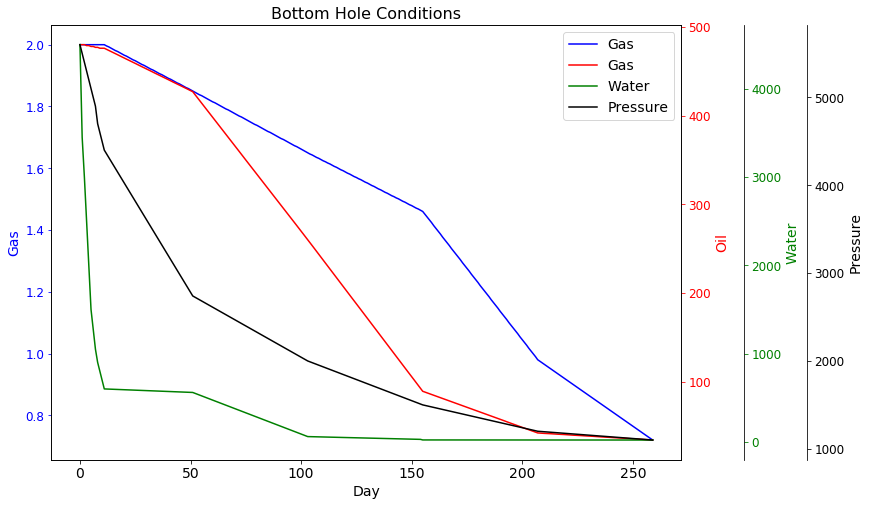

In [42]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
                   df['Oil_bpd'], "Oil", 
                   df['Water_bpd'],"Water",
                   df['FWHP_psig'], "Pressure",
                   "Day",
                   "Bottom Hole Conditions")

Prepare train and test data

In [43]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]

array([[ 1.35424511,  1.60939141,  8.72827458,  3.32943236, -2.81659682,
         7.01185356,  4.4775873 ,  6.91662268, -2.19543384,  6.943033  ,
        -0.83494708, -1.29424203, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60939141,  6.57031325,  3.2343483 , -2.78066104,
         5.49894161,  4.21604276,  5.13066463, -2.20145108,  5.41773605,
        -0.95416793, -1.28011973, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60939141,  5.64547268,  3.13926424, -2.69928834,
         4.82545573,  4.03776657,  4.39256873, -2.17885878,  4.75513176,
        -0.95797081, -1.27110885, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60331881,  4.61787205,  3.04418018, -2.62927343,
         4.09248449,  3.8195261 ,  3.54954734, -2.16869478,  4.02148975,
        -1.02534153, -1.25891402, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60331881,  3.59027141,  2.94909612, -2.58320837,
         3.37618506,  3.57371519,  2.67197104, -2.17489826,  3.29593777,
        -1.16599831, -1.24

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_pre, y_pre, test_size=0.3,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (182, 14) (182,)
Test set: (78, 14) (78,)


78

### *SVM*

In [45]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



In [46]:

svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_poly = svm.SVR(kernel='poly',gamma='auto', degree=6, epsilon=.1,
               coef0=1)

clf=svr_lin.fit(X_train, y_train)
print(clf.score(X_test,y_test))
y_hat=svr_lin.predict(X_test)
y_hat[0:50]
# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

0.999523059136511


array([ 521.22831703,  211.61691592,  933.26572126,  591.45716157,
        856.02041251,  505.38106896, 2292.25010498,  734.35467435,
        817.34534277,  701.85014009,  871.02272082,  356.94398564,
        471.89169555,  988.84510219,  390.03453176,  168.52428597,
       1327.88132772, 2321.89633026, 1400.99997577, 1885.96495722,
        618.46109837,  115.07583291,  334.40272715,  668.51501595,
       1019.18637309,  378.70740907,  161.03266064,  244.28579105,
       1036.88677936,  300.5076704 ,  221.49376638,  977.37785963,
        767.55055544, 2190.11335719,  317.54884533,  784.22343393,
        126.59012458,  219.04740134,  826.50053839,  189.87688675,
       1860.10581563, 1177.01431364,  166.04162719,  173.46703235,
       1964.15619721,  663.35264643,  801.08626808,  831.66705908,
        907.75181292,  795.30854422])

In [47]:

seed = 10
kfold = model_selection.KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(svr_lin, X_train, y_train, cv=kfold, scoring=scoring)
print("MAE:",results.mean(), results.std())


MAE: -7.993994995985759 4.733891813891925


In [48]:
scoring = 'neg_root_mean_squared_error'
results = model_selection.cross_val_score(svr_lin, X_train, y_train, cv=kfold, scoring=scoring)
print("MSE:", results.mean(), results.std())

MSE: -14.757572268530671 10.481840113713991


In [49]:
scoring = 'r2'
results = model_selection.cross_val_score(svr_lin, X_train, y_train, cv=kfold, scoring=scoring)
print("R^2:", results.mean(), results.std())

R^2: 0.99909012895169 0.000978615497983099


In [55]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, testx, testy, labelx,labely ):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey=True)
    for ix, svr in enumerate(svrs):
        axes[ix].plot(svr.fit(X_train, y_train).predict(testx), color=model_color[ix], lw=lw,
                      label='{} model'.format(kernel_label[ix]))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=True, shadow=True, fontsize=12)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle("Support Vector Regression", fontsize=14)
    plt.show()

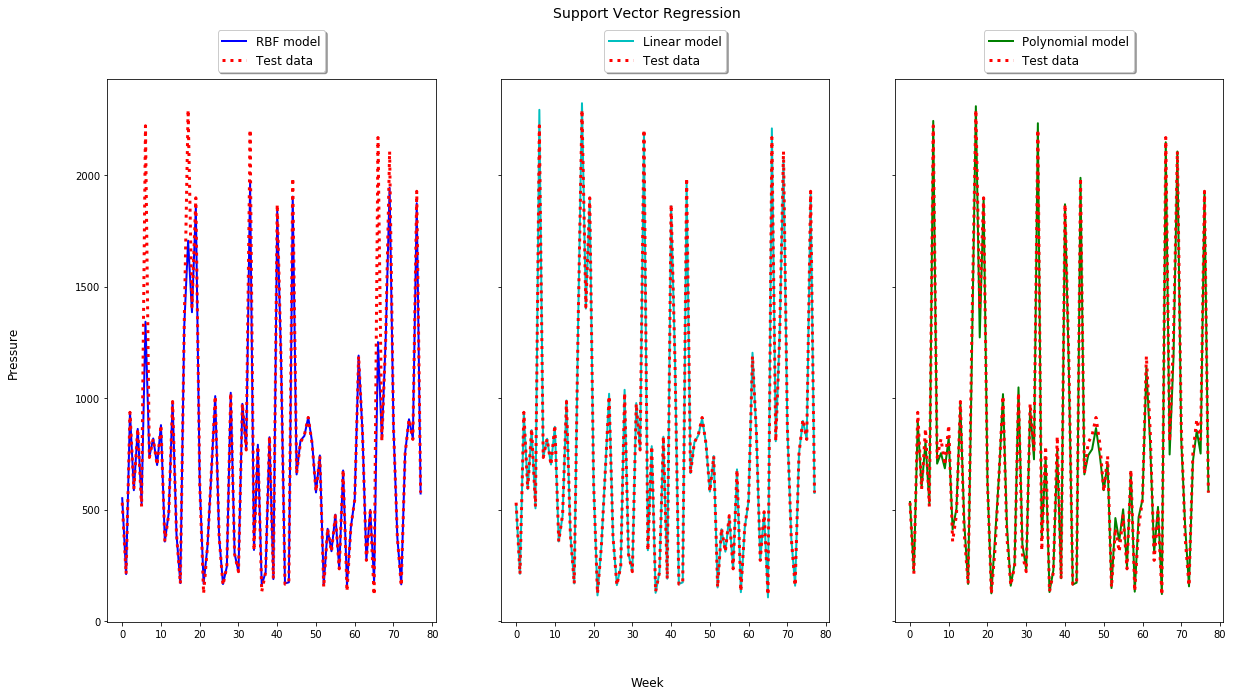

In [56]:
three_svr_plot(svr_rbf, "RBF",
               svr_lin, "Linear",
               svr_poly, "Polynomial",
               X_test,
               y_test,
               "Week",
               "Pressure")

In [52]:
y_test.reset_index(drop=True)


0      530.713776
1      211.352315
2      935.923113
3      591.495219
4      862.152229
         ...     
73     750.012894
74     903.808896
75     814.406787
76    1927.098320
77     575.733016
Name: FINAPRESS, Length: 78, dtype: float64